In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import os
from scipy import stats
import pandas as pd
import datetime

We investigate the effect of step size on the standard deviation of $\beta(t)$. All parameters were set to values that were calibrated for a step size of 1/12. The step size is then changed to fractions of 24 (and 48).

In [6]:
def beta_link_fn(x, info, data, y_offset=0.0, exp=True):
    slope = info["sigmoid_slope"]
    x_offset = -scipy.special.logit(data["beta_prior_mean"])
    if exp:
        return np.exp(x)
    else:
        return scipy.special.expit(slope * (x - x_offset)) + y_offset

def prop_std(state_idx, step):
    return np.exp(arr["means"][::step, state_idx]) * np.sqrt(arr["covs"][::step, state_idx, state_idx])

Check for correct step size(0.3333):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.1667):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0208):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.2500):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0833):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.5000):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0417):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


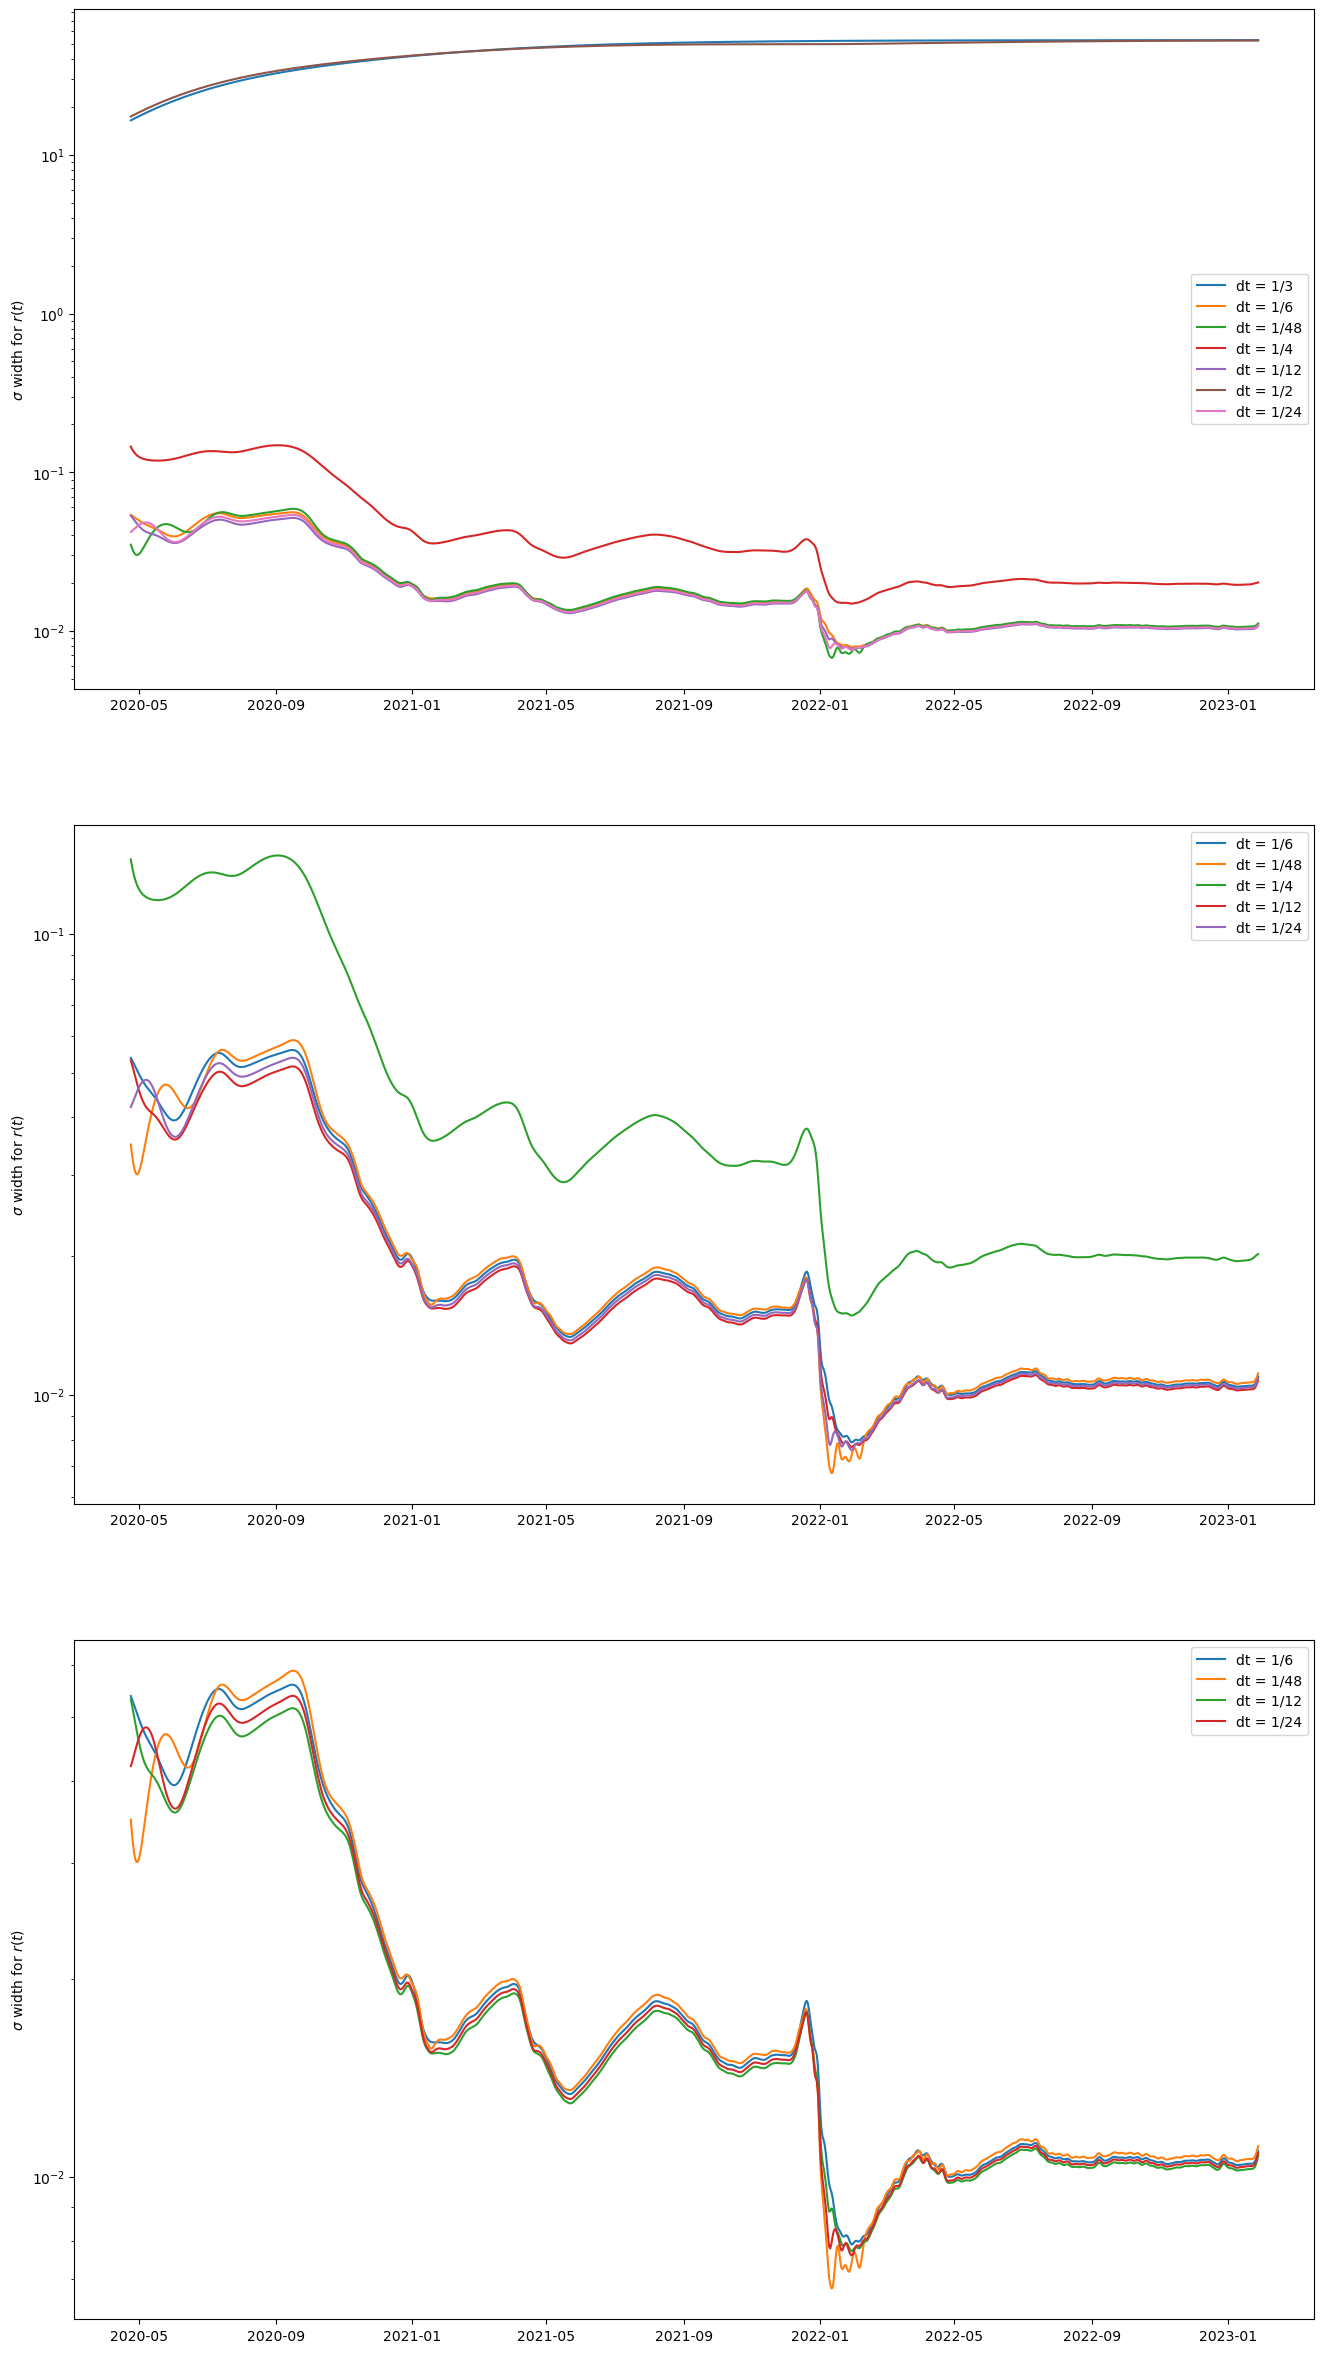

In [7]:
fig,axs = plt.subplots(3, 1, figsize=(16,30))

(start, end) = (100, -10)

for run in [el for el in os.listdir() if el.startswith("run_can")]:
    arr = np.load(run + "/posterior_first.npz")
    data = np.load(run + "/data_info.npz")
    
    tmin_idx, tmax_idx = data["time_domain"].astype(int)
    dates = data["date_range_x"][tmin_idx : tmax_idx]
    
    obs = pd.DataFrame({"daily": np.abs(np.diff(data["sir_data"][:, 0],
                    prepend=data["sir_data"].max())),
                    "cum" : data["population"] - data["sir_data"][:,0]},
                    index = dates)
    
    with open(run + "/info.json") as f:
        info = json.load(f)
    
    step = 1+int(1/info["filter_step_size"])
    
    if np.isclose(info["filter_step_size"], 0.25):
        step = int(1/info["filter_step_size"])
    
    if np.isclose(info["filter_step_size"], 0.3333333333):
        step = int(1/info["filter_step_size"])
        pass
        
    if np.isclose(info["filter_step_size"], 0.5):
        step = int(1/info["filter_step_size"])
        pass

    print("Check for correct step size({:.4f}): ".format(info["filter_step_size"]), data["dense_grid"][::step][:10])
    
    r_t_sigma_width = prop_std(-2, step)/data["gamma"]
    
    axs[0].plot(obs.index[start:end],r_t_sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    
    if info["filter_step_size"] <= 0.25:    
        axs[1].plot(obs.index[start:end],r_t_sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    
    if info["filter_step_size"] <= 1/6:    
        axs[2].plot(obs.index[start:end],r_t_sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
axs[0].set_ylabel(r"$\sigma$ width for $r(t)$")
axs[1].set_ylabel(r"$\sigma$ width for $r(t)$")
axs[2].set_ylabel(r"$\sigma$ width for $r(t)$");

Check for correct step size(0.3333):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.1667):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0208):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.2500):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0833):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.5000):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Check for correct step size(0.0417):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


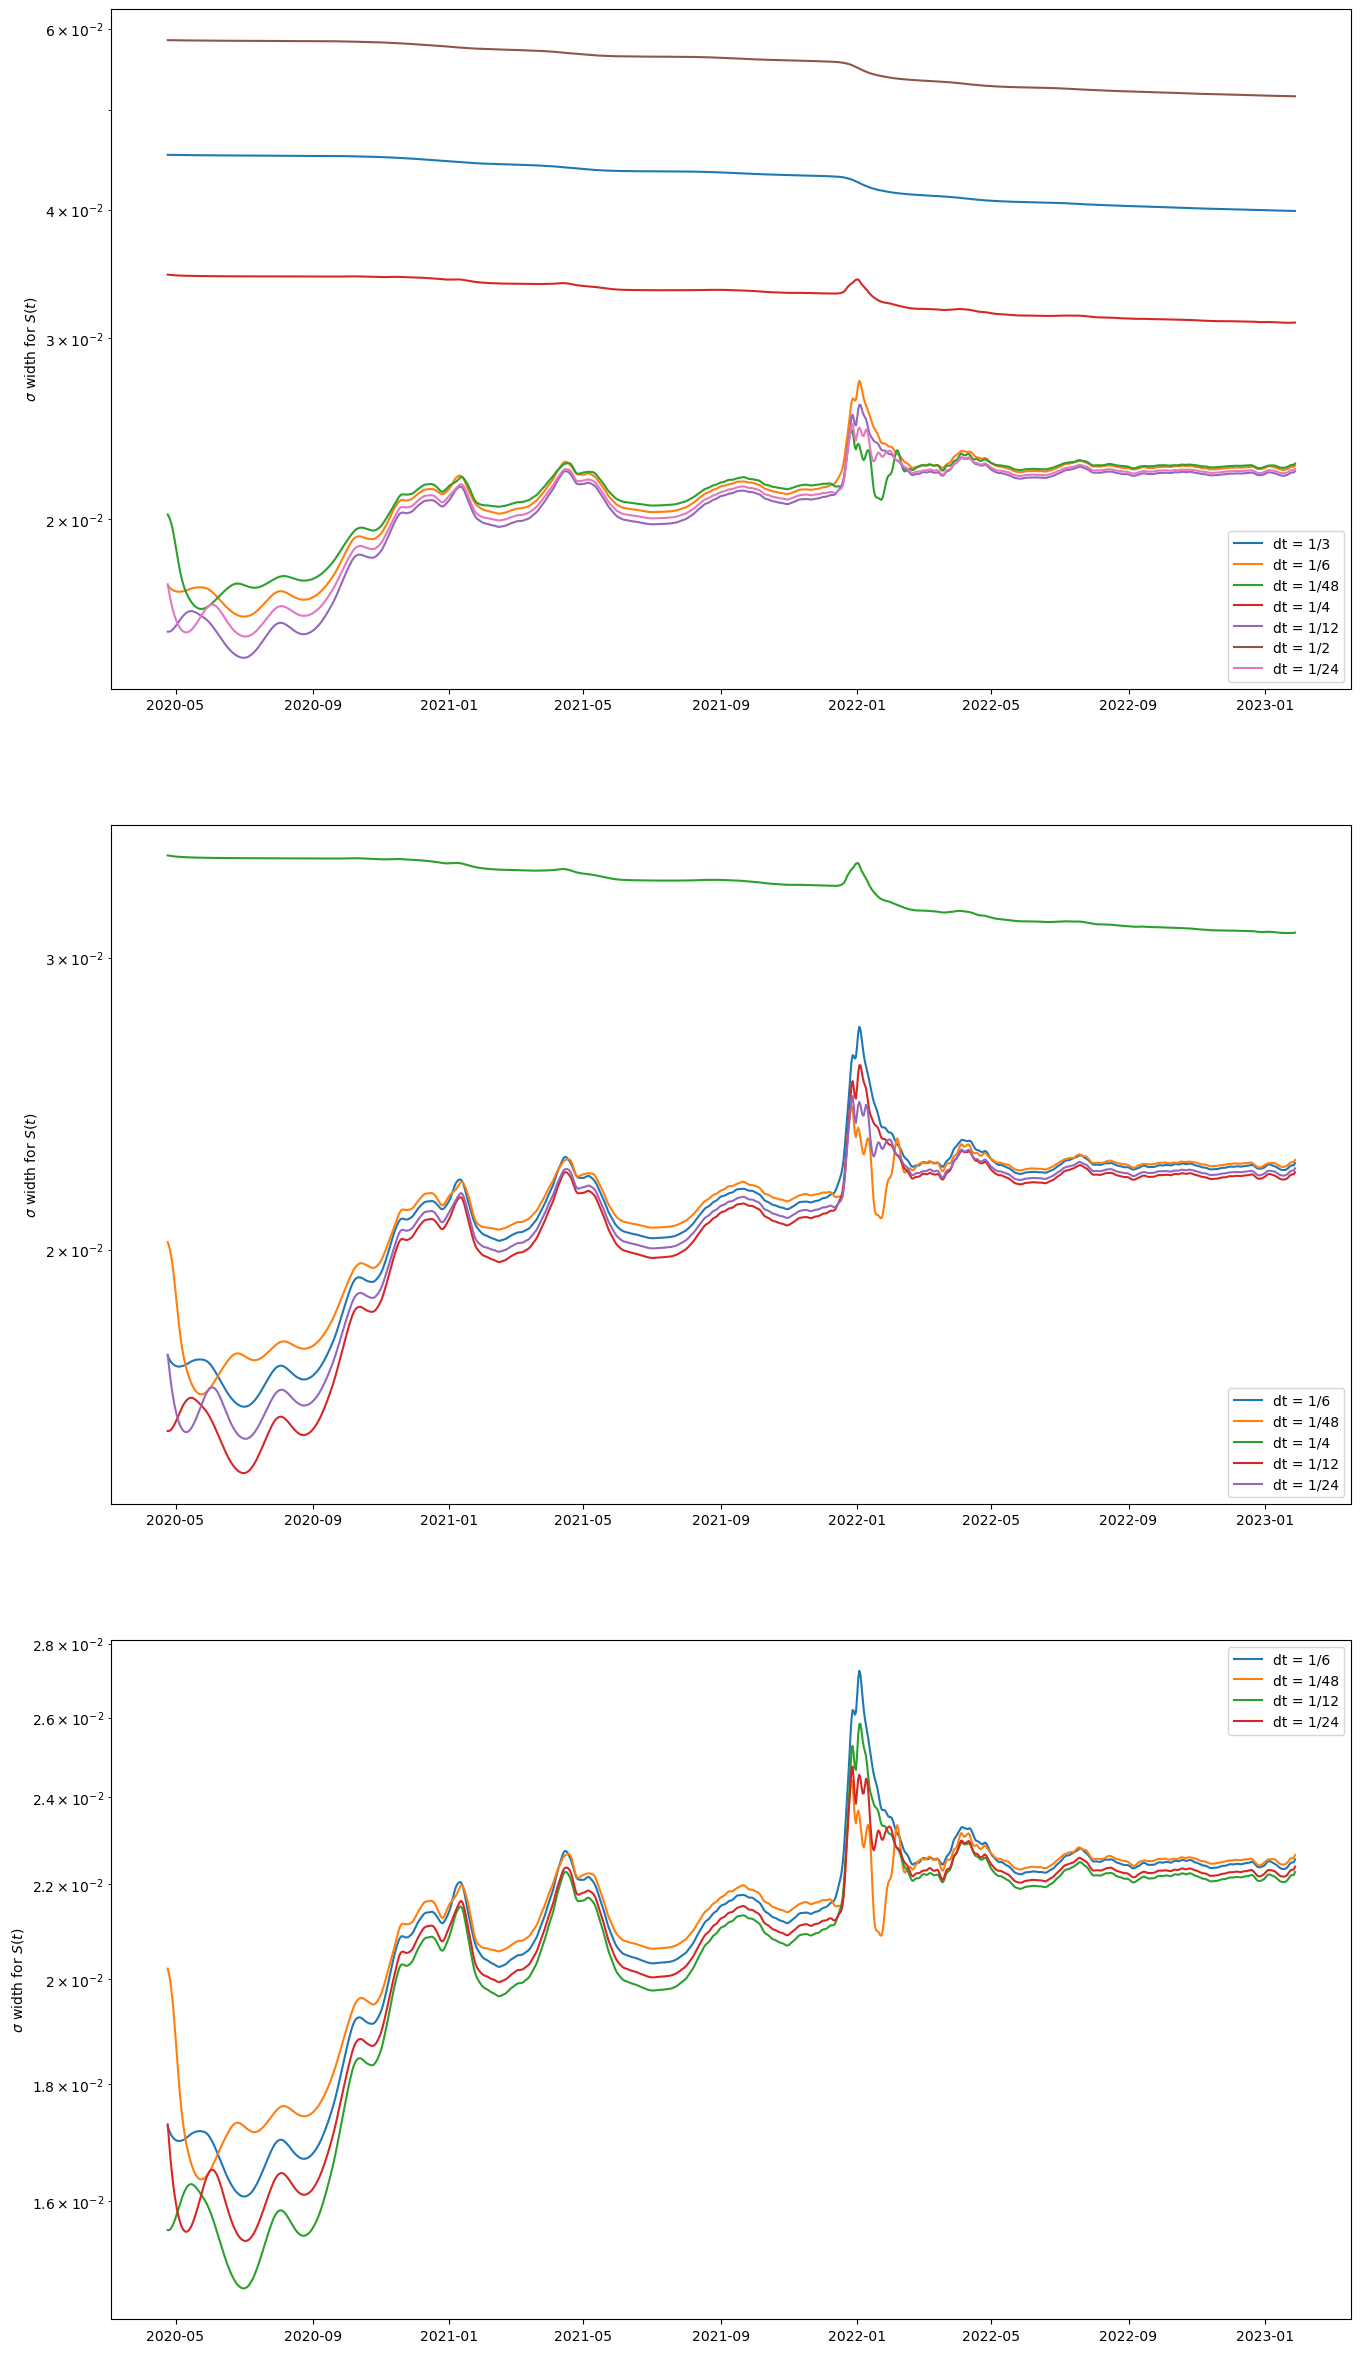

In [8]:
fig,axs = plt.subplots(3, 1, figsize=(16,30))

(start, end) = (100, -10)

for run in [el for el in os.listdir() if el.startswith("run_can")]:
    arr = np.load(run + "/posterior_first.npz")
    data = np.load(run + "/data_info.npz")
    
    tmin_idx, tmax_idx = data["time_domain"].astype(int)
    dates = data["date_range_x"][tmin_idx : tmax_idx]
    
    obs = pd.DataFrame({"daily": np.abs(np.diff(data["sir_data"][:, 0],
                    prepend=data["sir_data"].max())),
                    "cum" : data["population"] - data["sir_data"][:,0]},
                    index = dates)
    
    with open(run + "/info.json") as f:
        info = json.load(f)
    
    step = 1+int(1/info["filter_step_size"])
    
    if np.isclose(info["filter_step_size"], 0.25):
        step = int(1/info["filter_step_size"])
    
    if np.isclose(info["filter_step_size"], 0.3333333333):
        step = int(1/info["filter_step_size"])
        pass
        
    if np.isclose(info["filter_step_size"], 0.5):
        step = int(1/info["filter_step_size"])
        pass

    print("Check for correct step size({:.4f}): ".format(info["filter_step_size"]), data["dense_grid"][::step][:10])
    
    sigma_width = prop_std(0, step)
    
    axs[0].plot(obs.index[start:end],sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    
    if info["filter_step_size"] <= 0.25:    
        axs[1].plot(obs.index[start:end],sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    
    if info["filter_step_size"] <= 1/6:    
        axs[2].plot(obs.index[start:end],sigma_width[start:end], label="dt = 1/{}".format(int(1/info["filter_step_size"])))
    

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
axs[0].set_ylabel(r"$\sigma$ width for $S(t)$")
axs[1].set_ylabel(r"$\sigma$ width for $S(t)$")
axs[2].set_ylabel(r"$\sigma$ width for $S(t)$");

Conclusion:

1) standard deviation (and thus error) does increase with step size, but not monotonically. It is more of a tendency. Evidence: (1/2, 1/3, 1/4) have much higher std than (1/12, 1/6, 1/24, 1/48)
2) Locally (between 1/6 and 1/48), this tendency breaks down, as 1/12 has better standard deviation than the rest for most time steps. This could be because we calibrated with a step size of 1/12. Another investigation could be conducted to test this hypothesis, but it is unnecessary for the purpose of this study, as we only wish to understand the impact of step size on uncertainty.